<a href="https://colab.research.google.com/github/lshpy/DeepLearning_basic/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 확률적 경사 하강법


경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배운다


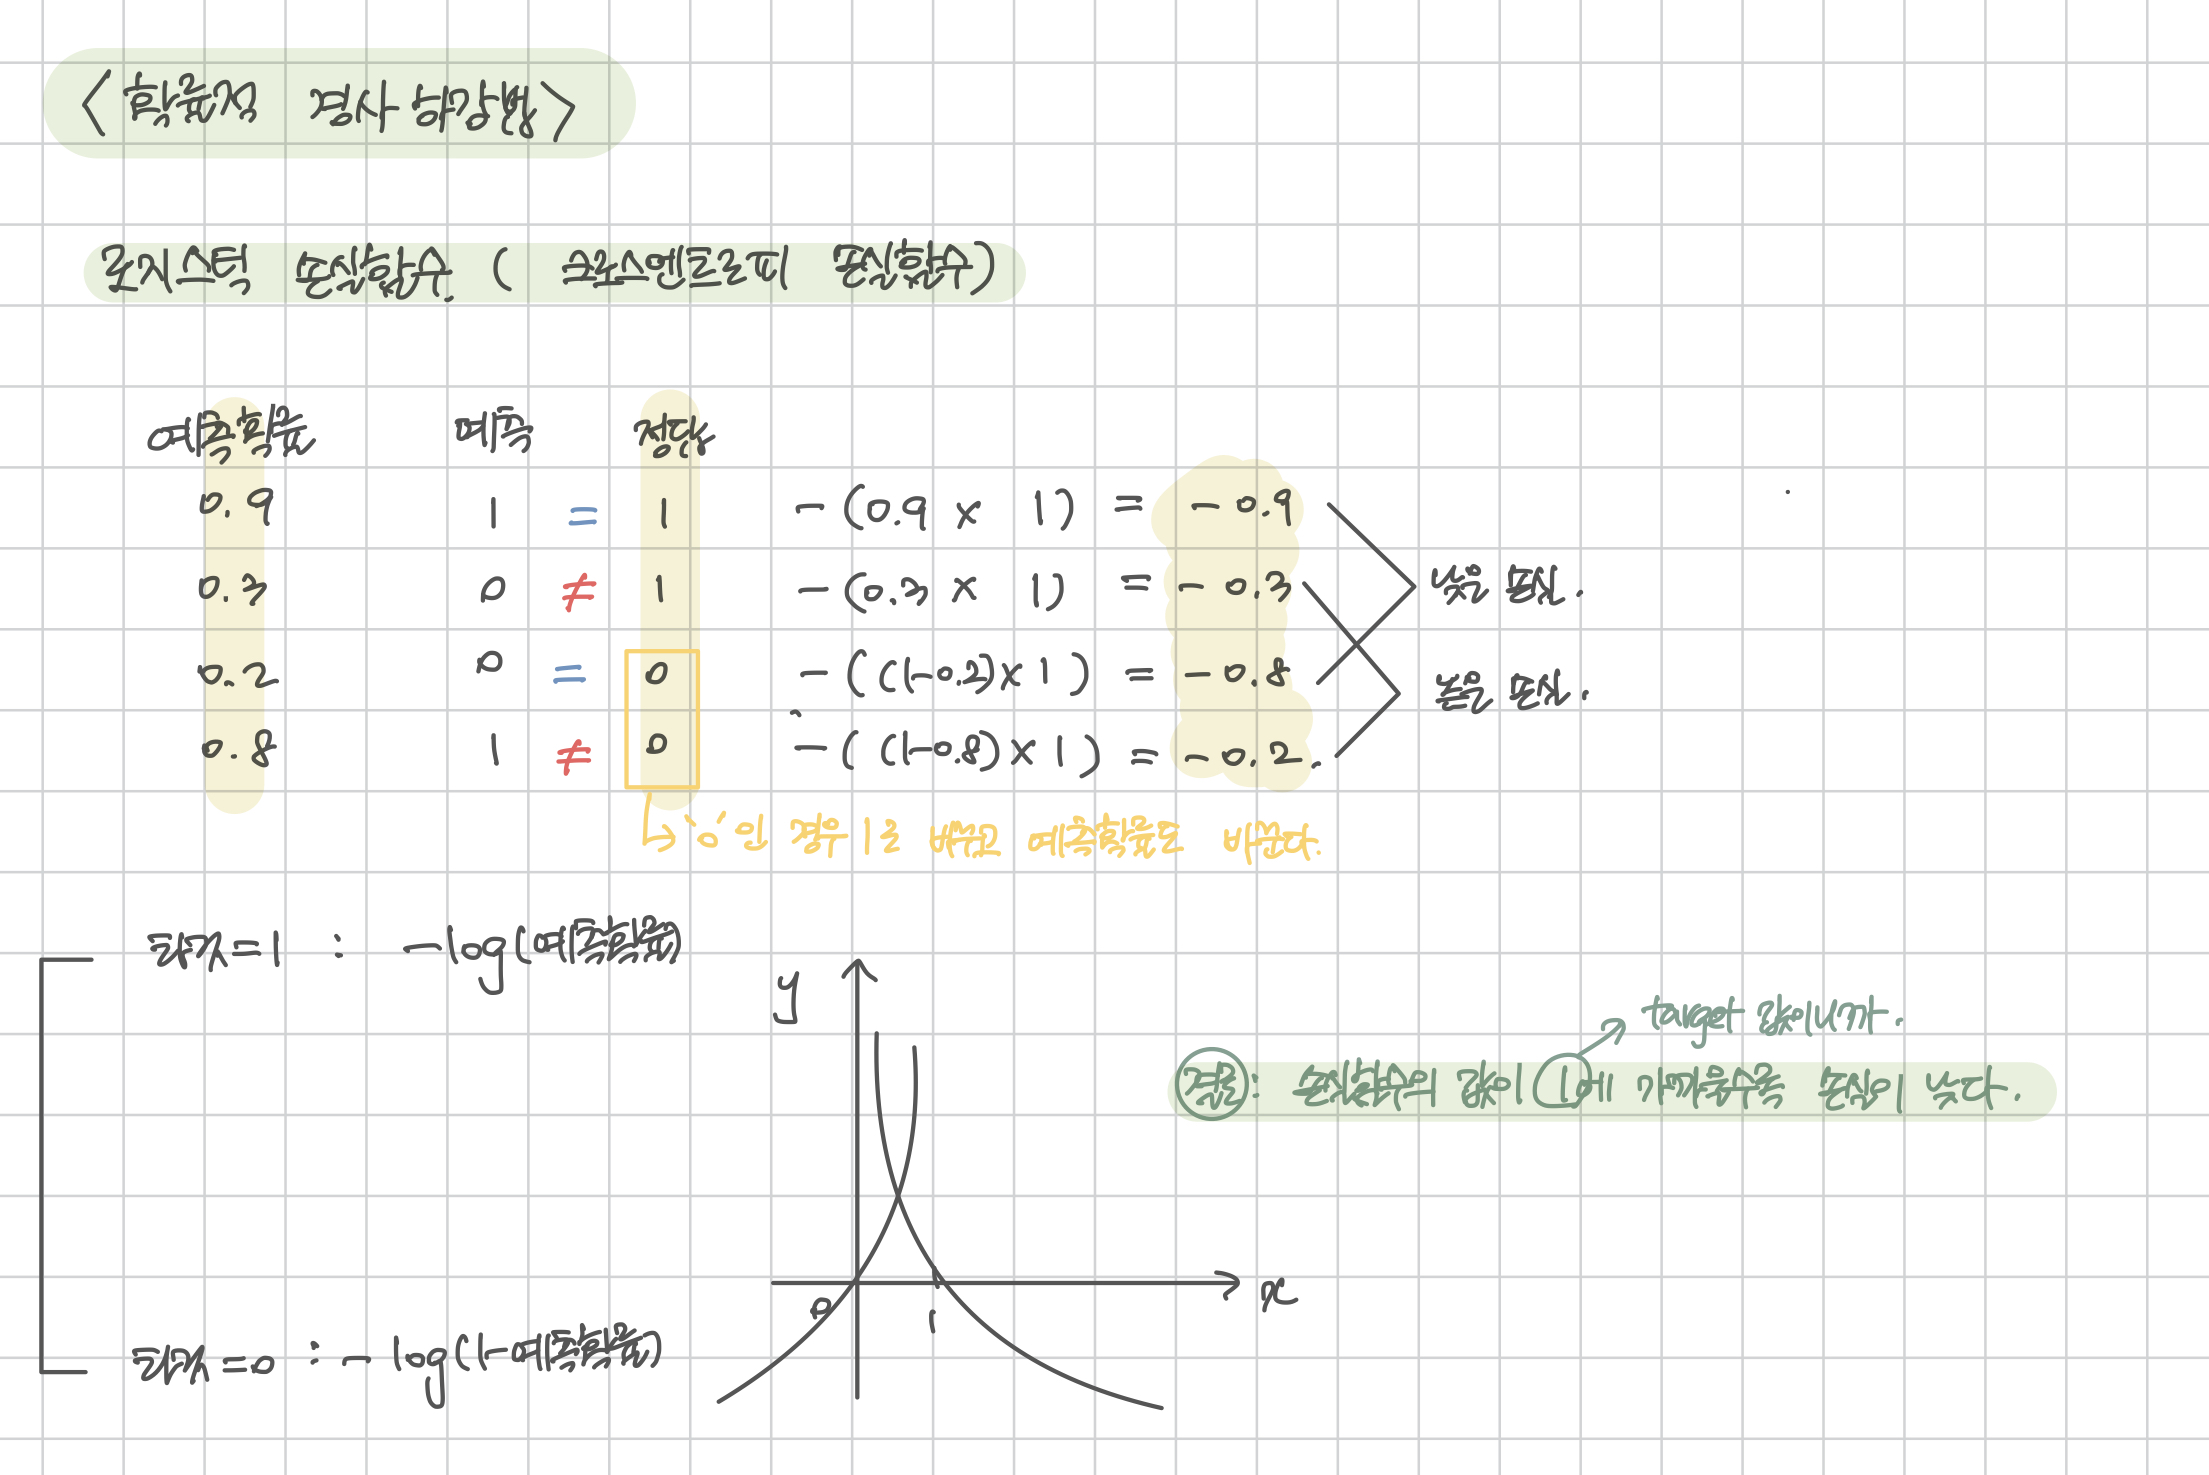

In [3]:
# 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련 --> 양이 너무 많음(NOPE)
# 이전 데이터를 버리면서 훈련--> 생략의 위험 있음


# 점진덕 학습(훈련한 데이터를 버리지 않고 새로운 데이터에 대해서 조금씩만 학습)

# 확률적 경사 하강법
# epoch: 훈련세트를 한 번 모두 사용하는 과정

# 훈련세트를 사용해서 산 아래의 최적이 장소로 조금씩 이동하는 알고리즘
# 미니배치 경사 하강법 or 배치 경사 하강법


# 산 : 손실함수 > 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
# 손실함수의 값이 적을 수록 좋음



In [ ]:
# -1 * 예측 확률 * 정답(타깃)
# if 타깃 =  0
# -1 *(1-예측확률) * 1
# 마지막에 로스함수에 넣기

In [6]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [10]:
fish_input = fish.iloc[:, 1:].to_numpy()
fish_target = fish['Species'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [15]:
# 데이터 표준화하기
from sklearn.preprocessing import StandardScaler

ss  = StandardScaler()
ss.fit(train_input)

train_scaled  = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
# 경사하강법에서 사용하는 분류용 클래스

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)

sc.fit(train_scaled, train_target) # 두가지를 모두 fit해주어야 한다
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


# 낮은 이유: 지정한 반복횟수 10번이 부족하다

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
# 모델을 이러서 훈련
#partial_fit()

sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 그렇다면 점진적 훈련을 도데체 몇번을 더 해야하는가..?


0.8067226890756303
0.8


## 에포크와 과대/과소 적합

In [35]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target) # 7개의 생선의 목록을 준비한다



In [36]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


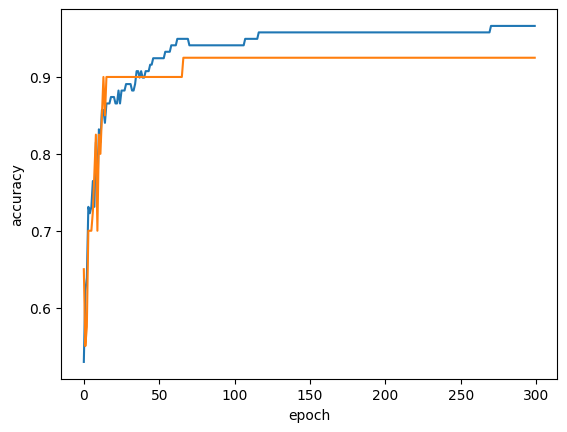

In [37]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 가장 차이가 적게 일어나는 100을 기준으로 다시

In [41]:
sc = SGDClassifier(loss  = 'log_loss', max_iter = 100, tol = None,random_state=42)

# 일정 에포트 동안 성능이 향상되지 않으면 종료
# tol = None 으로 해서 무조건 max_iter  = 100 까지 반복하도록 설정

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
